In [99]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sweetviz as sv
sns.set()

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)

In [102]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [103]:
bos["Target"] = boston.target

In [104]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [105]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [106]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [107]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Target     float64
dtype: object

In [108]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

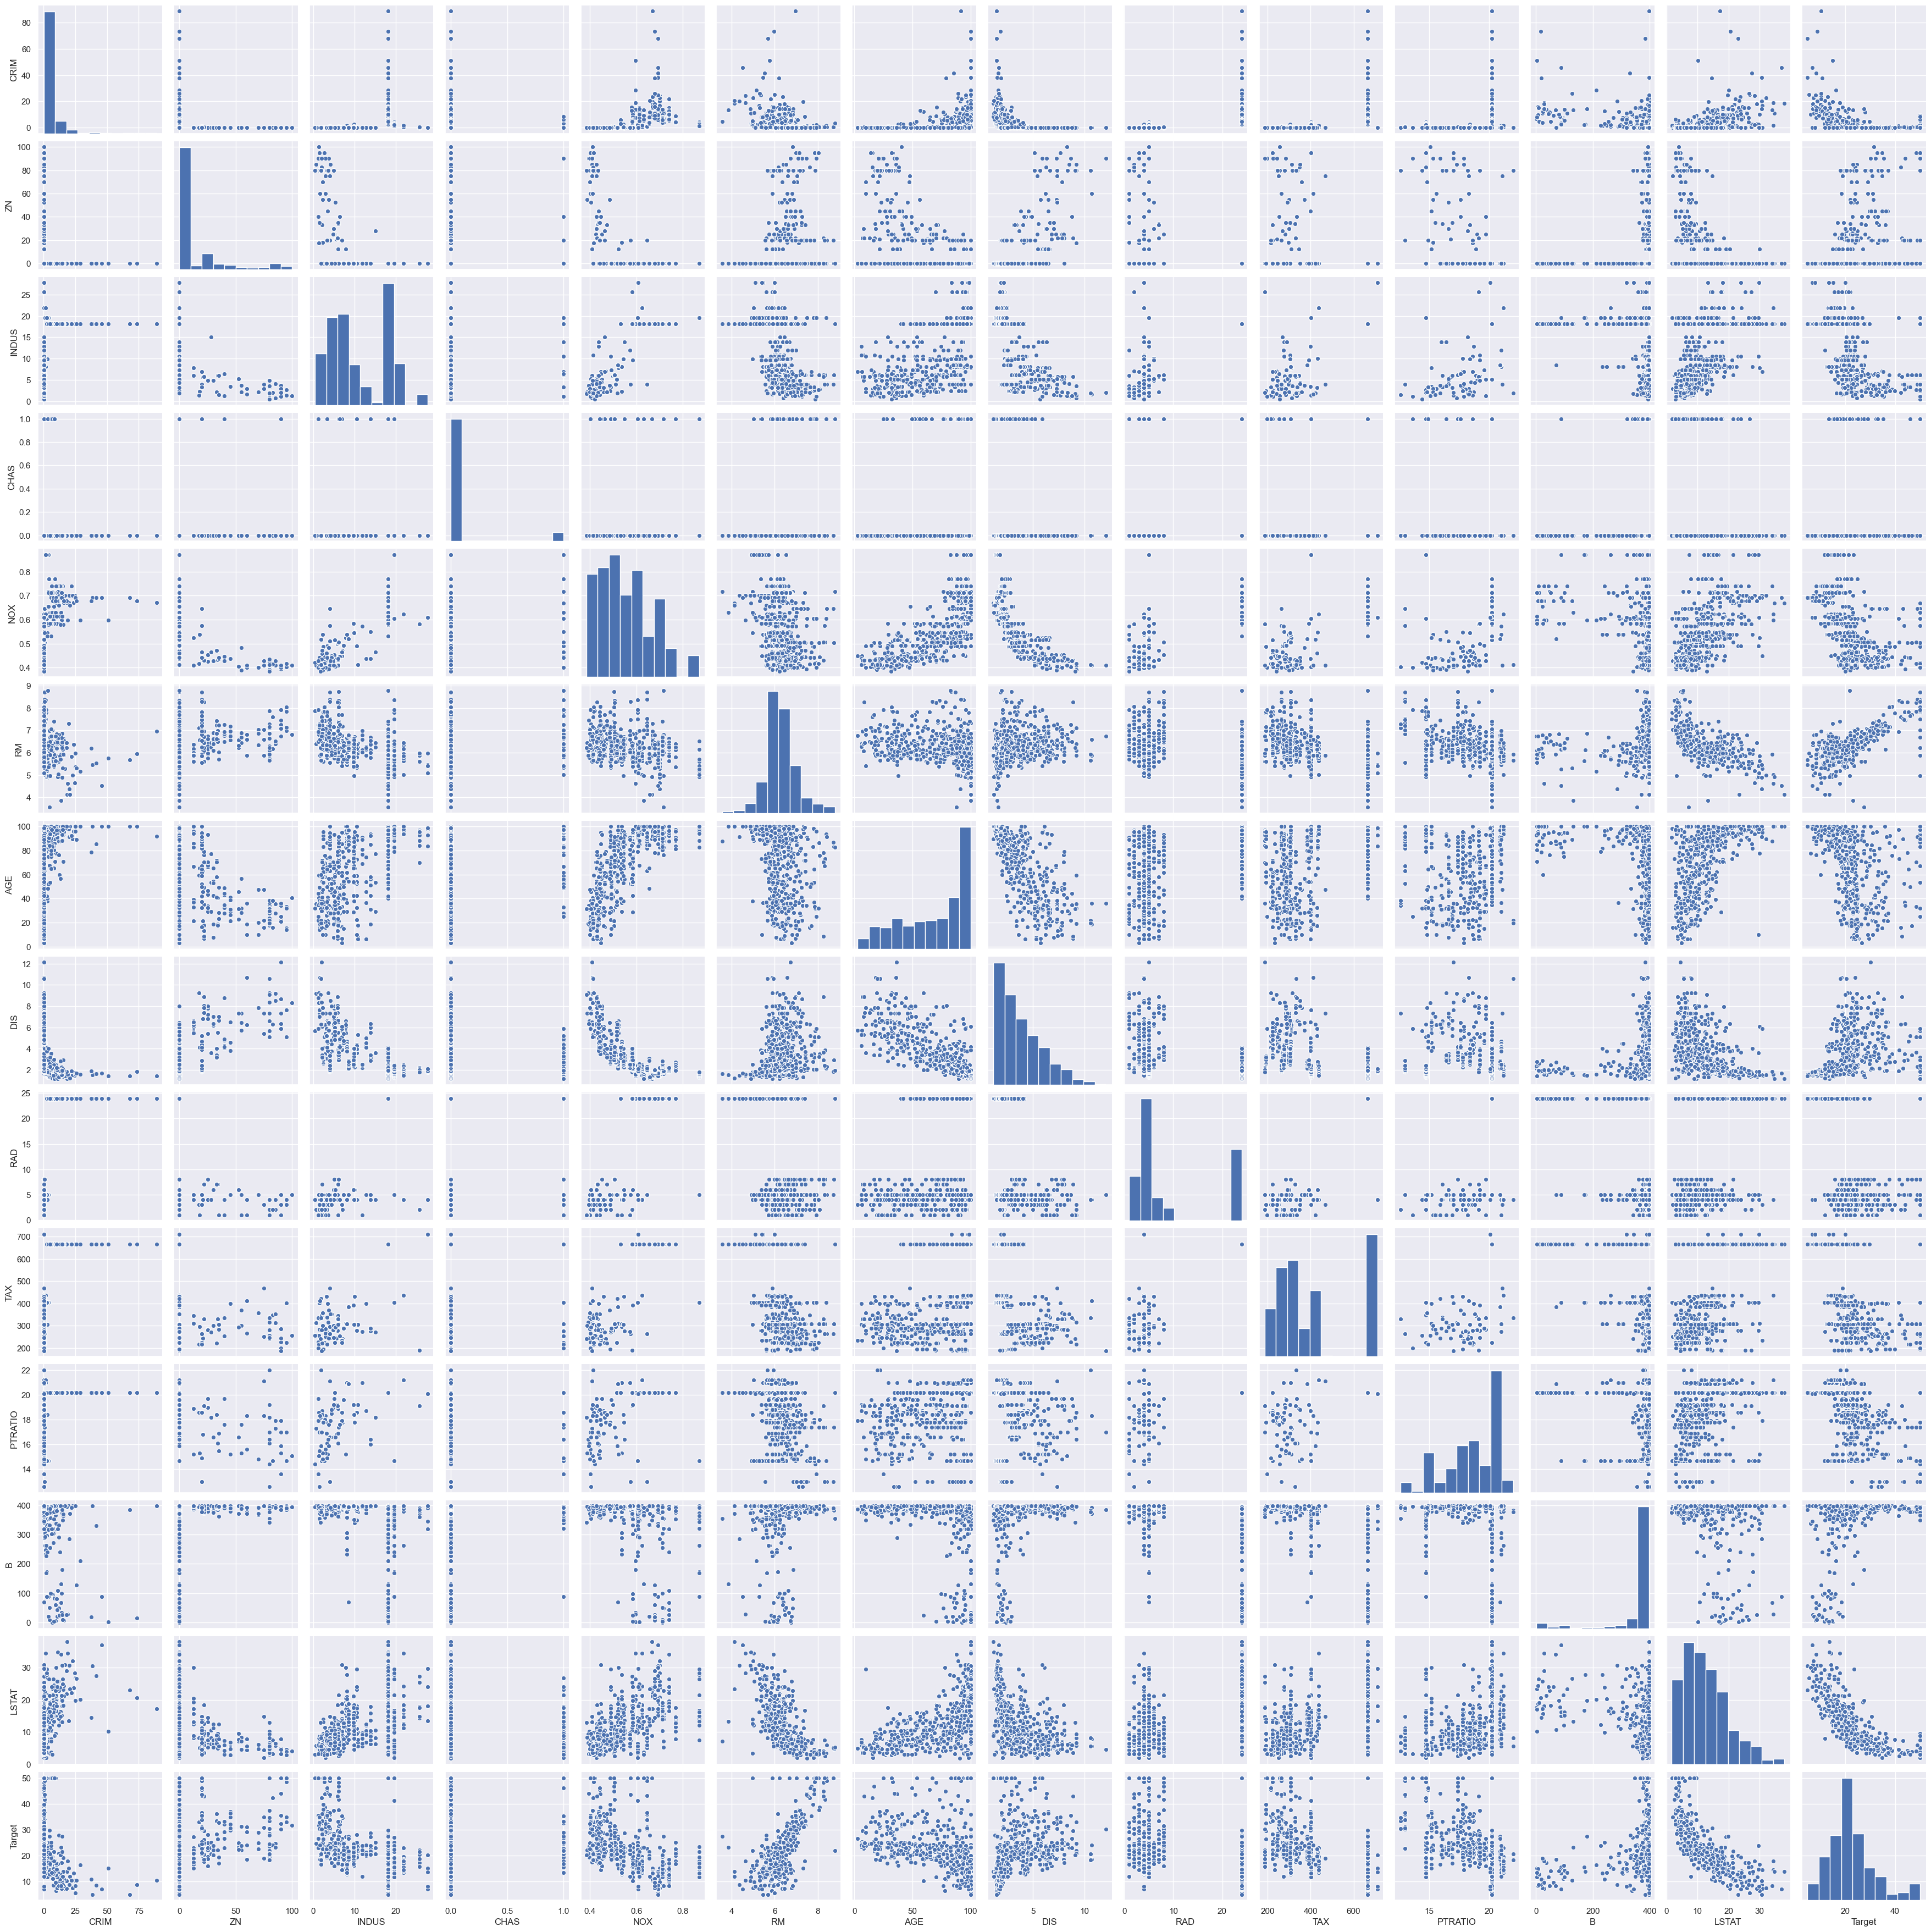

In [109]:
sns.pairplot(bos)

In [110]:
'''plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()'''

"plt.figure(figsize=(20,25), facecolor='white')\nplotnumber = 1\n\nfor column in bos:\n    if plotnumber<=16 :\n        ax = plt.subplot(4,4,plotnumber)\n        sns.distplot(bos[column])\n        plt.xlabel(column,fontsize=20)\n    plotnumber+=1\nplt.tight_layout()"

In [13]:
my_report = sv.analyze(bos, target_feat="Target")

:FEATURES DONE:                    |█████████████████████| [100%]   00:22  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [14]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [111]:
corrmat = bos.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

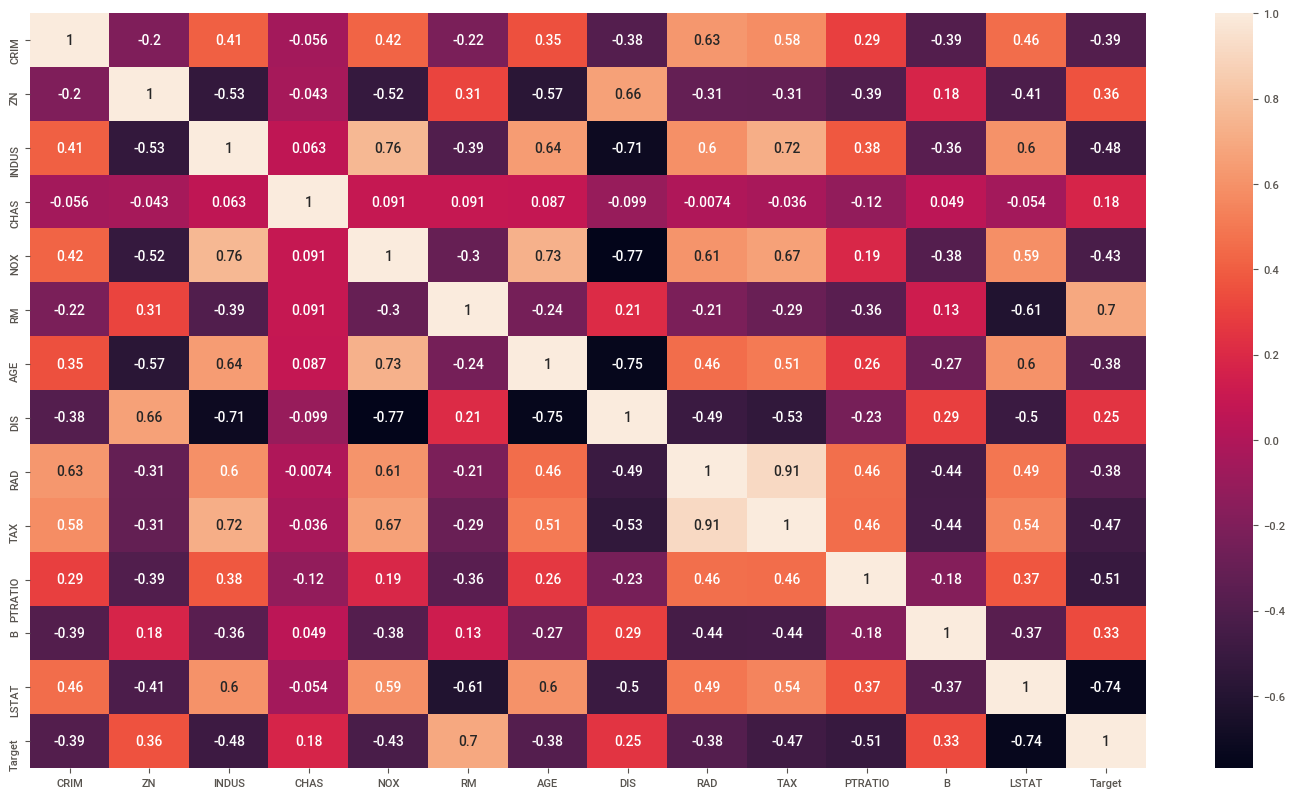

In [16]:
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrmat, annot=True, annot_kws={"size":10})

In [112]:
X=bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y=bos['Target']

In [113]:
X= sm.add_constant(X)
ols = sm.OLS(Y,X).fit()

In [114]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 06 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        17:21:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
y = bos['Target']
x =bos.drop(columns = ['Target'])

<AxesSubplot:>

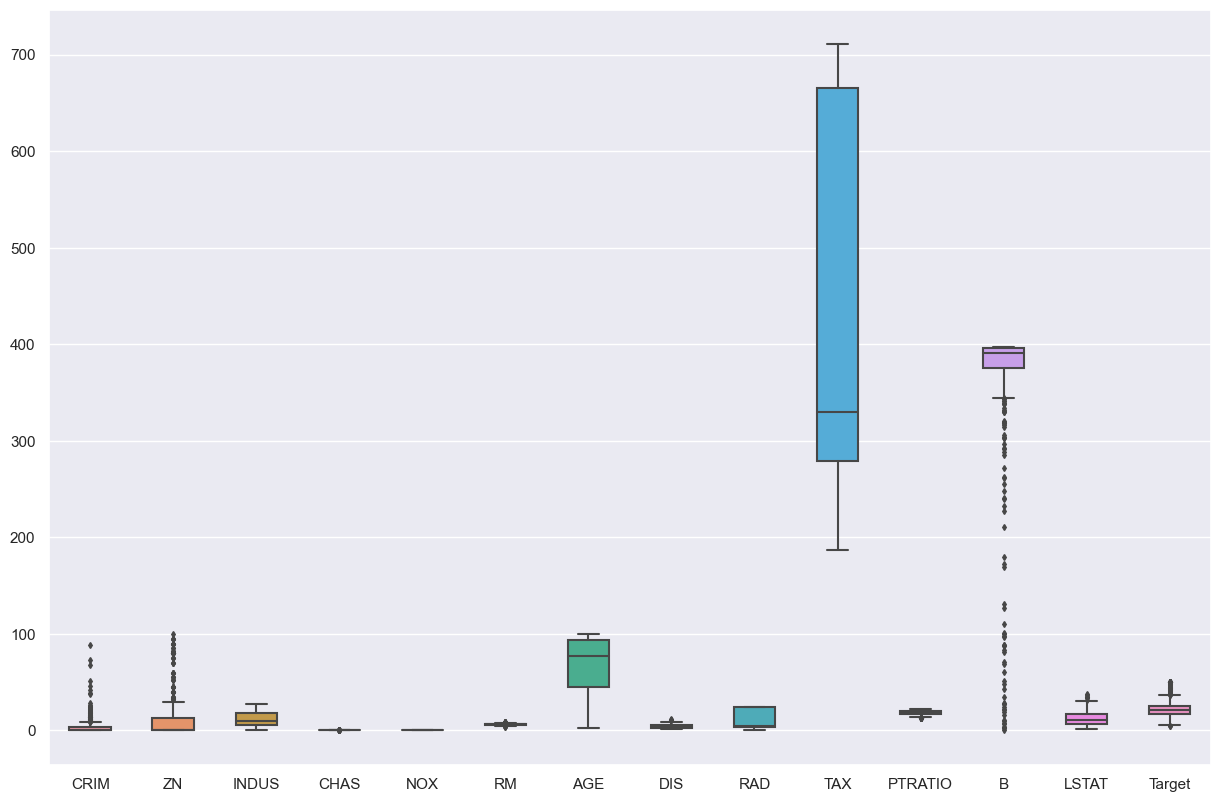

In [116]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)

In [117]:
data=bos.copy()

Text(0, 0.5, 'Target')

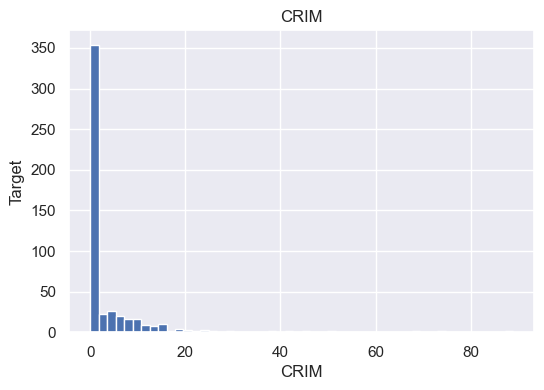

In [118]:
figure= bos.CRIM.hist(bins=50)
figure.set_title("CRIM")
figure.set_xlabel("CRIM")
figure.set_ylabel("Target")

<AxesSubplot:>

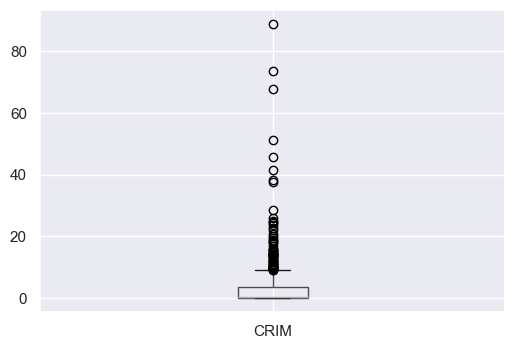

In [119]:
bos.boxplot(column ="CRIM")

In [120]:
IQR_CRIM = data.CRIM.quantile(0.75)-bos.CRIM.quantile(0.25)
IQR_CRIM

3.5950375

In [121]:
data.CRIM.quantile(0.75)

3.6770825

In [122]:
lower_bound=data["CRIM"].quantile(0.25)-(IQR_CRIM*3)
higher_bound=data["CRIM"].quantile(0.75)+(IQR_CRIM*3)
print(lower_bound), print(higher_bound)

-10.7030675
14.462195000000001


(None, None)

In [123]:
data.loc[data["CRIM"]>=14, "CRIM"]=14

Text(0, 0.5, 'Target')

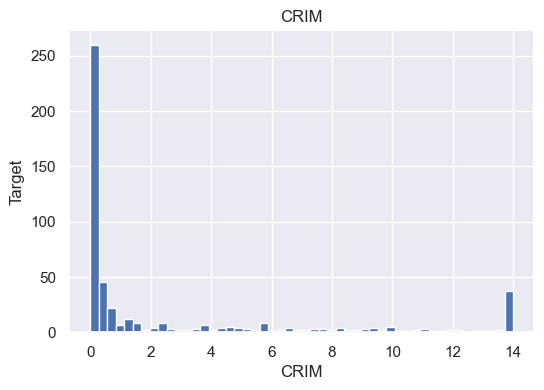

In [124]:
figure= data.CRIM.hist(bins=50)
figure.set_title("CRIM")
figure.set_xlabel("CRIM")
figure.set_ylabel("Target")

<AxesSubplot:>

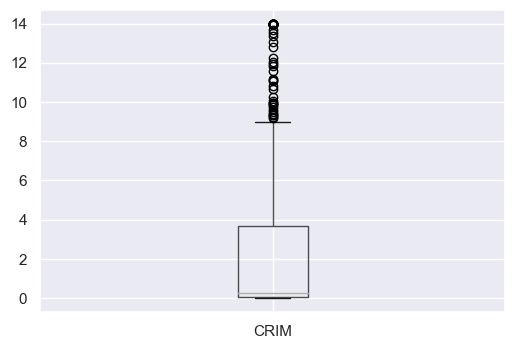

In [125]:
data.boxplot(column ="CRIM")

Text(0, 0.5, 'Target')

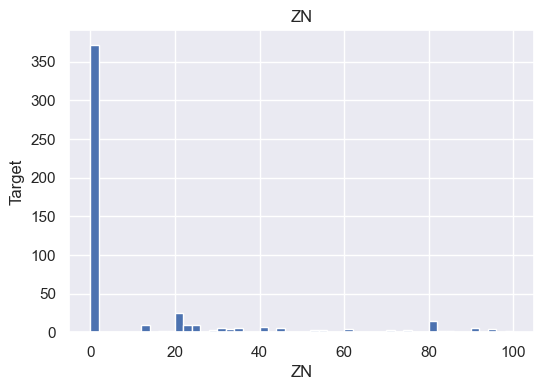

In [126]:
figure= bos.ZN.hist(bins=50)
figure.set_title("ZN")
figure.set_xlabel("ZN")
figure.set_ylabel("Target")

In [127]:
IQR_ZN = data.ZN.quantile(0.75)-data.ZN.quantile(0.25)
IQR_ZN

12.5

In [128]:
lower_ZN=data["ZN"].quantile(0.25)-(IQR_ZN*3)
higher_ZN=data["ZN"].quantile(0.75)+(IQR_ZN*3)
print(lower_ZN), print(higher_ZN)

-37.5
50.0


(None, None)

In [129]:
data.loc[data["ZN"]>=50, "ZN"]=50

Text(25.078125, 0.5, 'Target')

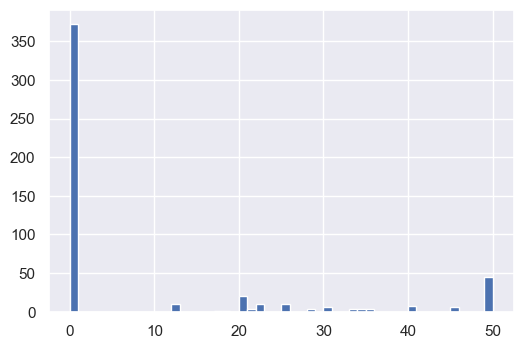

In [130]:
figure_zn= data.ZN.hist(bins=50)
figure.set_title("ZN")
figure.set_xlabel("ZN")
figure.set_ylabel("Target")

<AxesSubplot:>

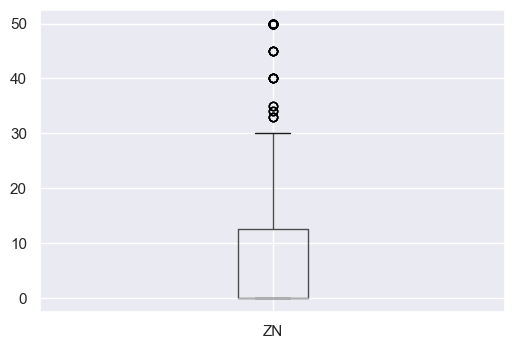

In [131]:
data.boxplot(column ="ZN")

Text(0, 0.5, 'Target')

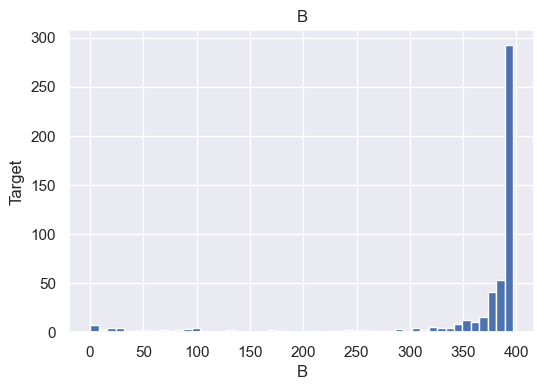

In [132]:
figure= bos.B.hist(bins=50)
figure.set_title("B")
figure.set_xlabel("B")
figure.set_ylabel("Target")

<AxesSubplot:>

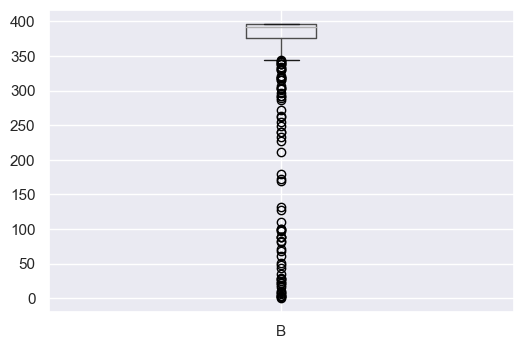

In [133]:
bos.boxplot(column ="B")

In [134]:
IQR_B = data.B.quantile(0.75)-data.B.quantile(0.25)
IQR_B

20.847500000000025

In [135]:
lower_B=data["B"].quantile(0.25)-(IQR_B*3.0)
higher_B=data["B"].quantile(0.75)+(IQR_B*3.0)
print(lower_B), print(higher_B)

312.8349999999999
458.7675000000001


(None, None)

In [136]:
data.loc[data["B"]<=312, "B"]=312

<AxesSubplot:>

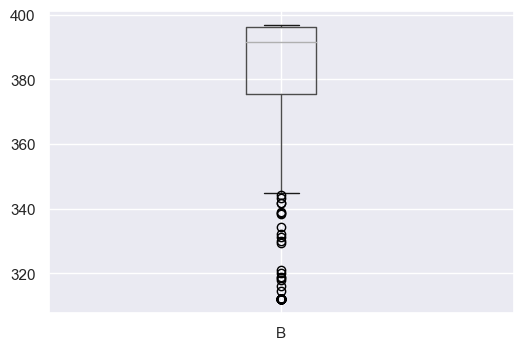

In [137]:
data.boxplot(column ="B")

Text(0, 0.5, 'Target')

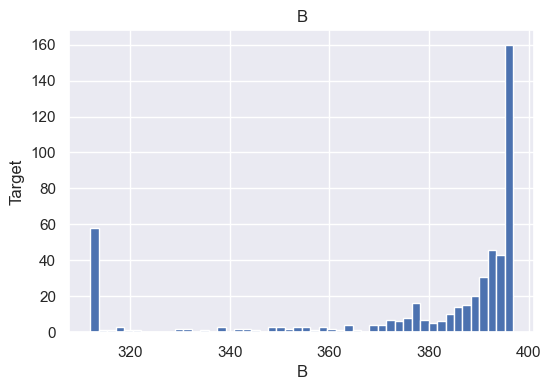

In [138]:
figure= data.B.hist(bins=50)
figure.set_title("B")
figure.set_xlabel("B")
figure.set_ylabel("Target")

In [139]:
bos["LSTAT"].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

<AxesSubplot:>

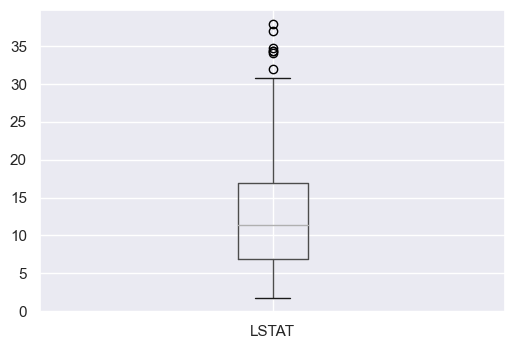

In [140]:
bos.boxplot(column ="LSTAT")

In [141]:
upper_limit=data["LSTAT"].mean()+3*data["LSTAT"].std()
lower_limit=data["LSTAT"].mean()-3*data["LSTAT"].std()
print(lower_limit),print(upper_limit) 

-8.77012129293899
34.07624777515244


(None, None)

In [142]:
IQR_L = data.LSTAT.quantile(0.75)-bos.LSTAT.quantile(0.25)
IQR_L

10.005000000000003

In [143]:
lower_l=data["LSTAT"].quantile(0.25)-(IQR_L*1.5)
higher_l=data["LSTAT"].quantile(0.75)+(IQR_L*1.5)
print(lower_l), print(higher_l)

-8.057500000000005
31.962500000000006


(None, None)

In [144]:
data.loc[data["LSTAT"]>=34, "LSTAT"]=34

<AxesSubplot:>

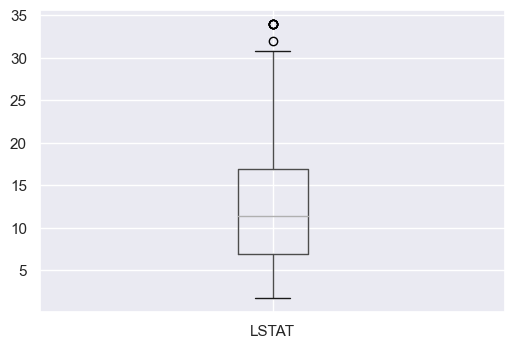

In [145]:
data.boxplot(column ="LSTAT")

<AxesSubplot:>

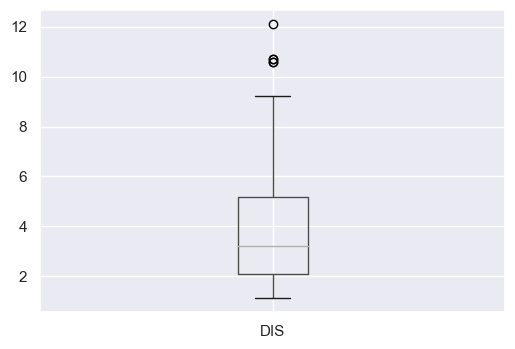

In [147]:
bos.boxplot(column ="DIS")

In [148]:
upper_limit_dis=data["DIS"].mean()+3*data["DIS"].std()
lower_limit_dis=data["DIS"].mean()-3*data["DIS"].std()
print(lower_limit_dis),print(upper_limit_dis)

-2.5220876921357975
10.112173067629865


(None, None)

In [149]:
IQR_dis= data.DIS.quantile(0.75)-bos.DIS.quantile(0.25)
IQR_dis

3.0882500000000004

In [150]:
data.loc[data["DIS"]>=10, "DIS"]=10

<AxesSubplot:>

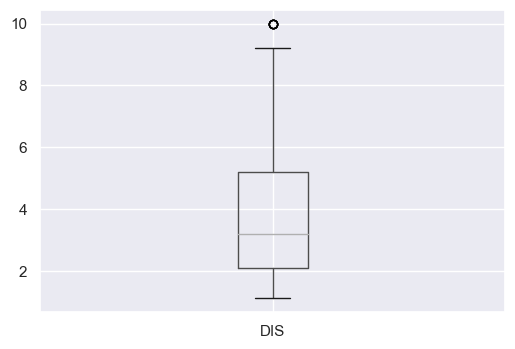

In [151]:
data.boxplot(column ="DIS")

<AxesSubplot:>

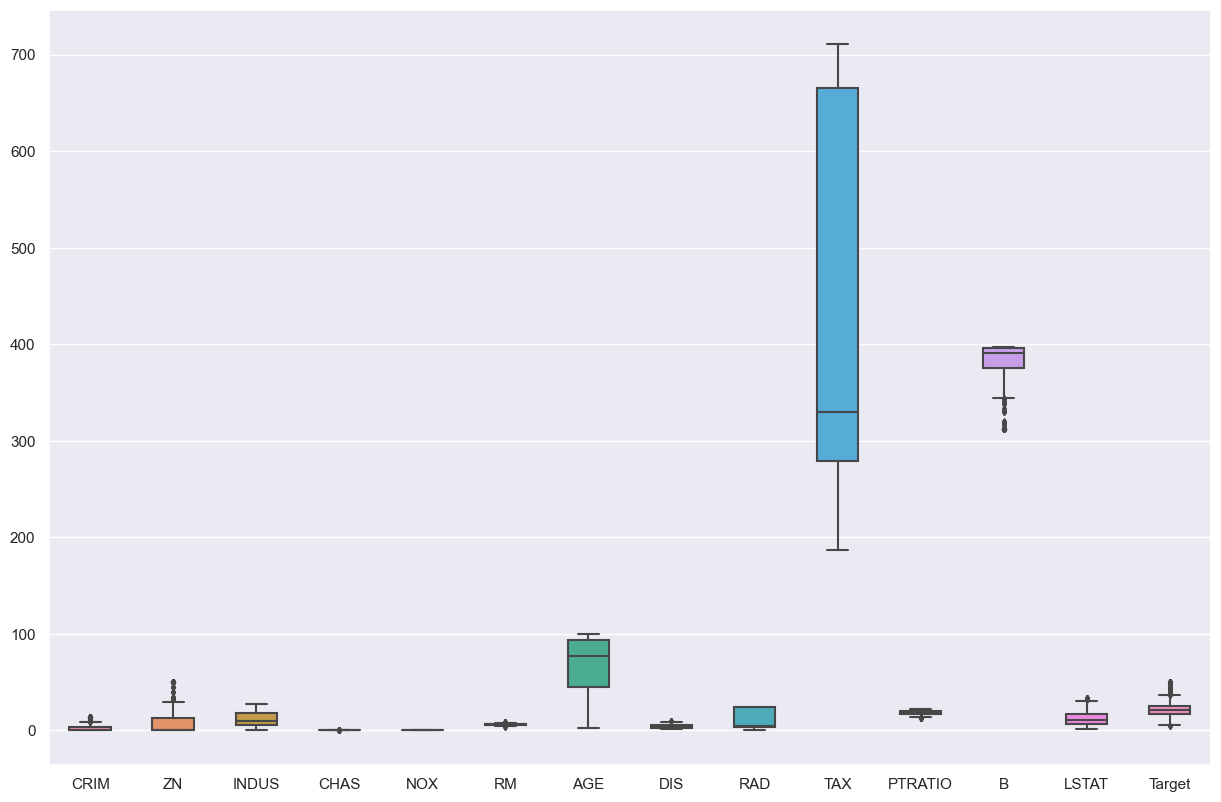

In [152]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

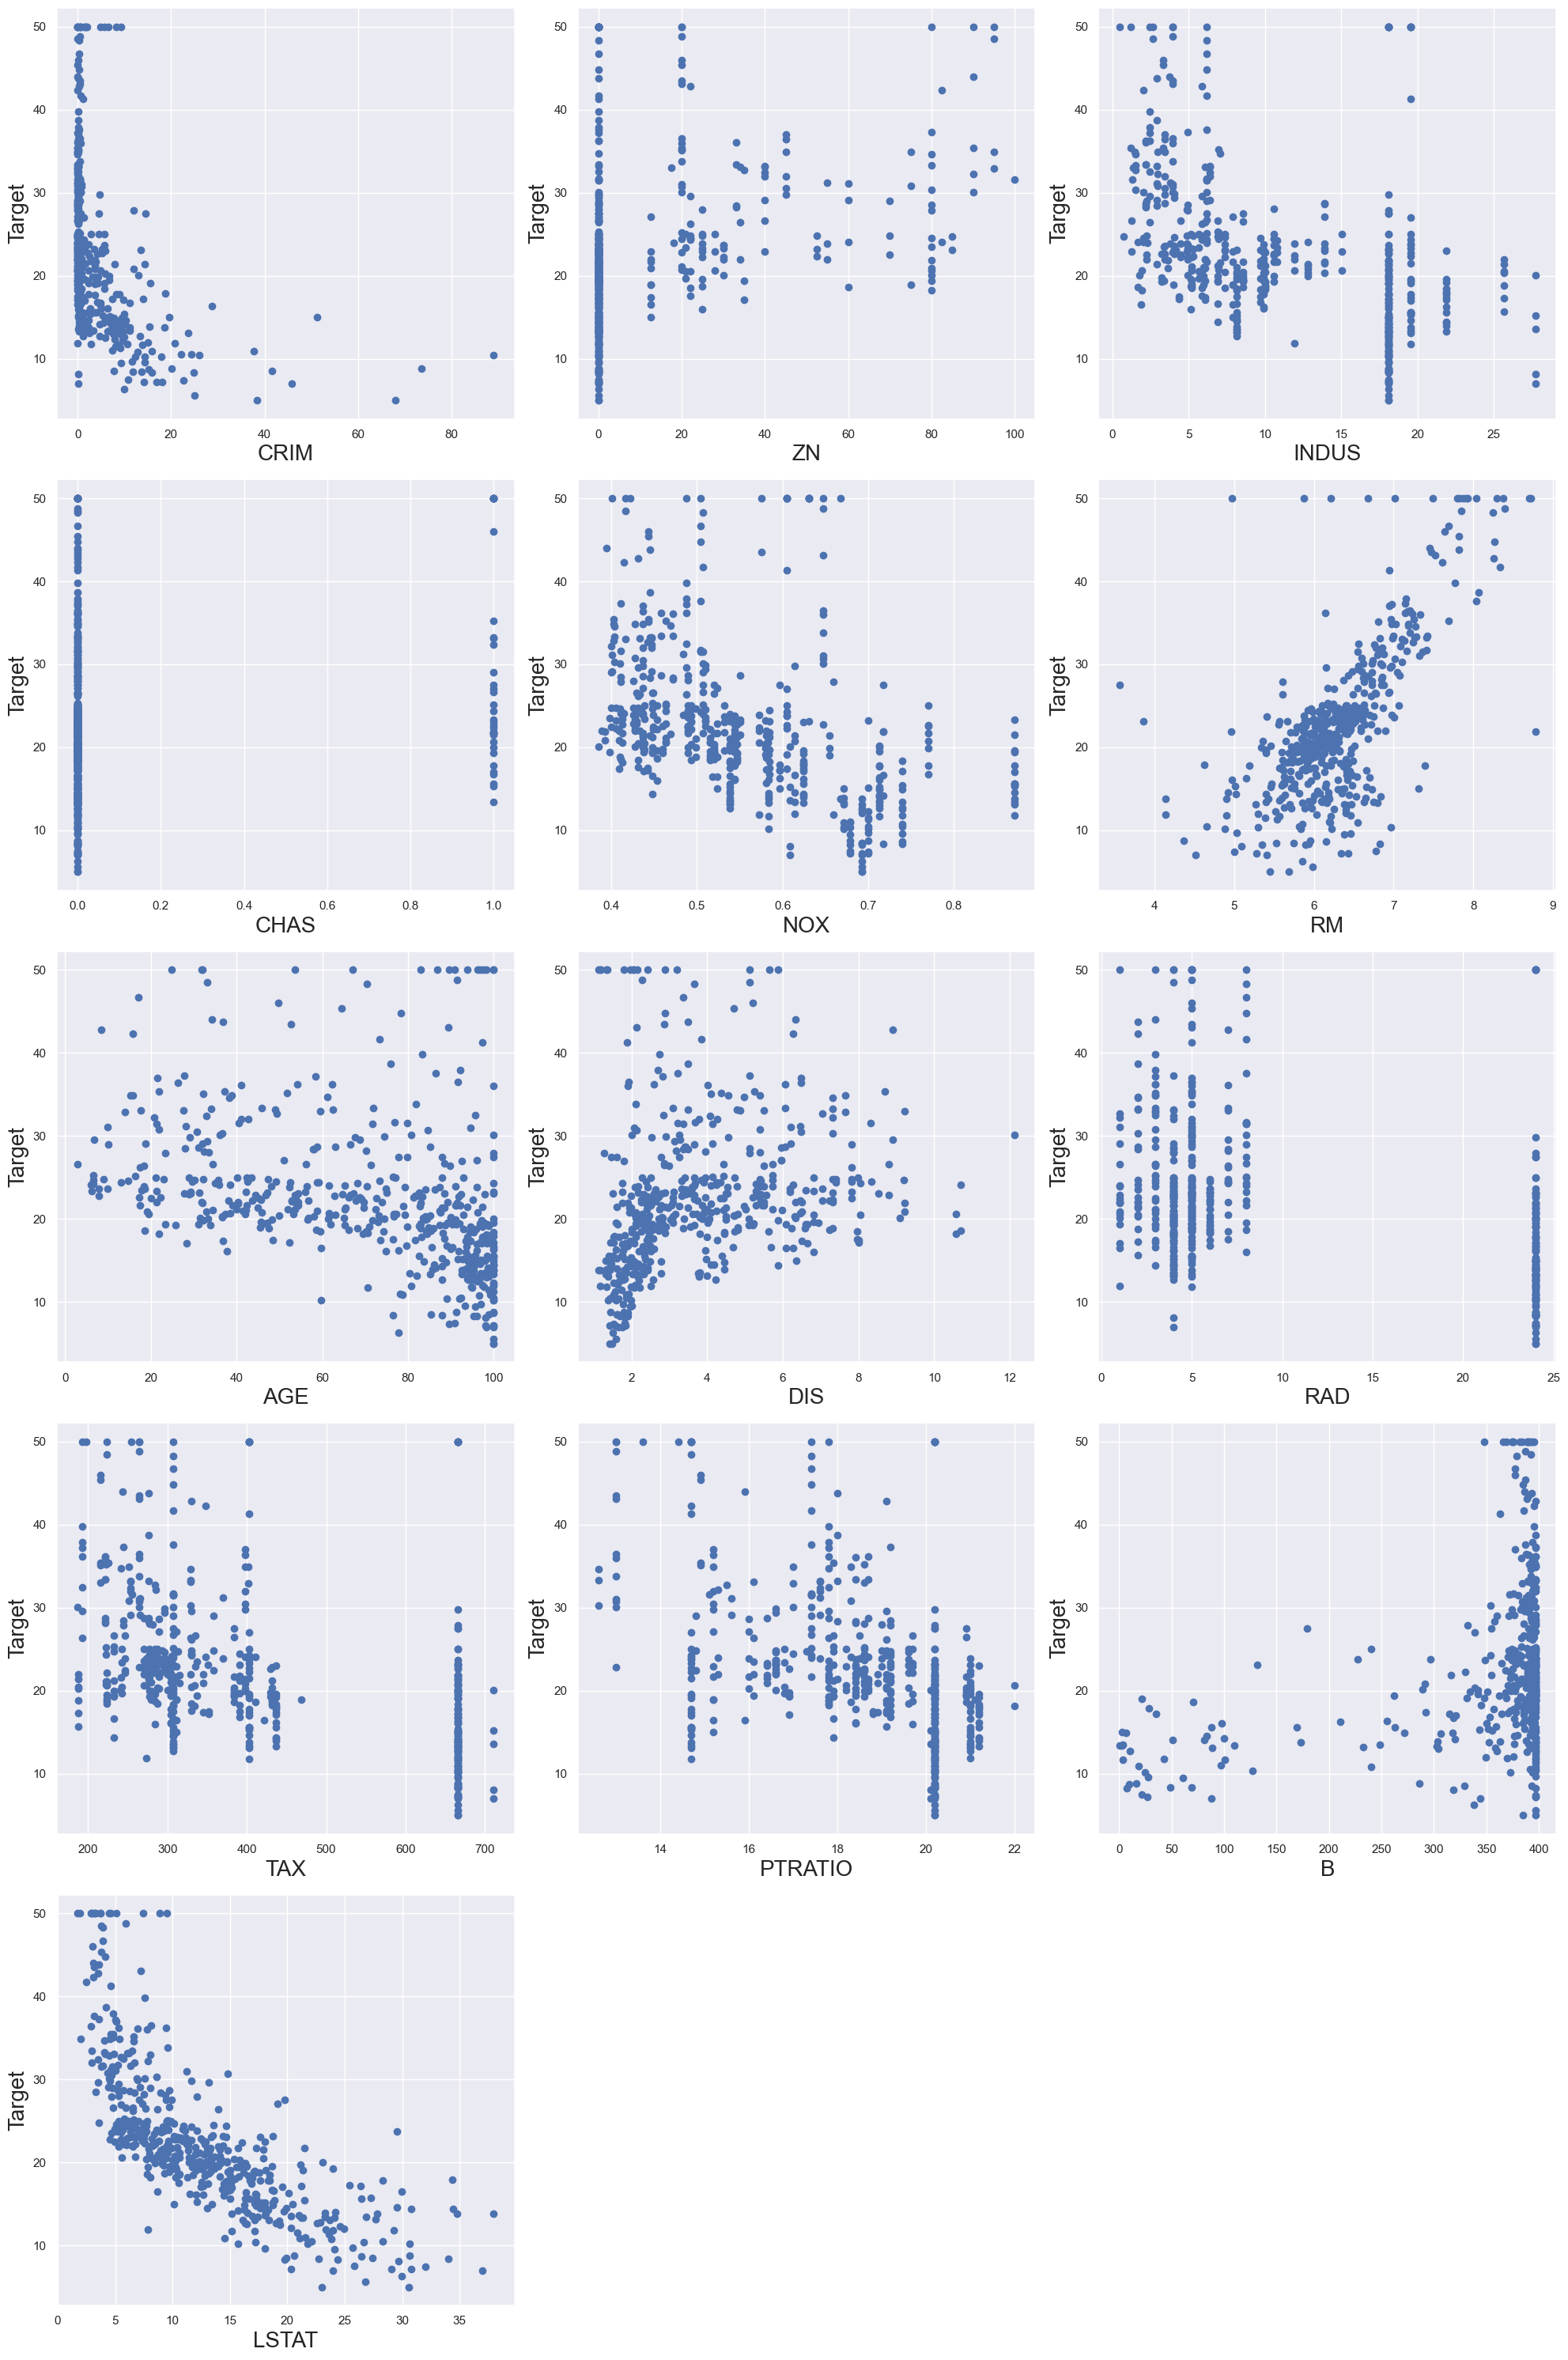

In [153]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Target',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [155]:
x=data.drop('Target',axis=1)
y=data['Target']
print("shape of x=",x.shape)
print("shape of y=",y.shape)

shape of x= (506, 13)
shape of y= (506,)


In [180]:
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [181]:
variables = x_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Target"] = x.columns

In [182]:
vif.sort_values(by ="VIF", ascending = False)

,VIF,Target
8,10.121789,RAD
9,8.957779,TAX
0,5.571635,CRIM
4,4.436665,NOX
7,4.161882,DIS
2,4.035158,INDUS
12,3.131582,LSTAT
6,3.113212,AGE
1,2.520750,ZN
5,1.894153,RM


In [183]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=355)

In [184]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [193]:
y_pred = regression.predict(x_test)

In [194]:
df=pd.DataFrame(data = [y_pred, y_test])
df.T

,0,1
0,12.018747,15.2
1,18.781794,18.0
2,30.880315,30.5
3,24.134679,23.4
4,5.184190,10.2
...,...,...
122,21.241302,50.0
123,13.443640,13.8
124,34.136411,34.6
125,12.580204,5.0


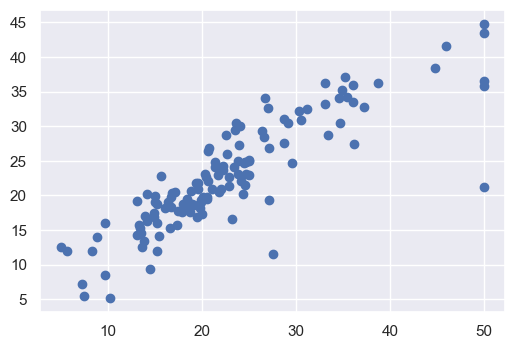

In [199]:
plt.scatter(y_test,y_pred)

In [195]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [196]:
regression.score(x_train,y_train)

0.7218975117869146

In [197]:
regression.score(x_test,y_test)

0.7445476993830271

In [198]:
r_square=r2_score(y_test, y_pred)
r_square

0.7445476993830271

In [168]:
adj_r2(x_train,y_train)

0.7119924916587774

In [169]:
adj_r2(x_test,y_test)

0.7151593816129329

In [170]:
regression.coef_

array([-0.75384708,  0.83059791, -0.15521548,  0.99466737, -2.03701784,
        3.02381246, -0.33377983, -3.02213976,  2.05340755, -1.54802052,
       -1.91808376,  0.19844234, -3.23357082])

In [171]:
# Lasso Regularization
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [200]:
alpha = lasscv.alpha_
alpha

0.0003646150964835736

In [201]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0003646150964835736)

In [202]:
lasso_reg.score(x_test, y_test)

0.7445031206003543

In [203]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([3.2762482 , 1.27801674, 5.8174915 , 8.34421266, 8.34590936,
       3.75827354, 3.21946922, 8.64782877, 2.68600147, 1.11095606,
       9.89375188, 6.56574798, 6.33907505, 8.37279366, 6.93811264,
       2.15399246, 2.00914332, 2.75707336, 4.68465552, 5.78289322,
       3.86563221, 6.81735084, 9.85643556, 3.37675674, 0.97962386,
       0.33737798, 8.52399508, 0.22804565, 9.39773169, 6.23055252,
       1.66522282, 1.58249017, 2.60523991, 6.02685249, 8.02845128,
       4.41219881, 7.24744704, 3.27066604, 3.25010388, 1.88105823,
       4.79274593, 4.03136053, 7.11420469, 0.04021802, 5.02801378,
       1.9897606 , 6.63685196, 4.43862159, 3.58464757, 7.67992958]),
        cv=10, normalize=True)

In [204]:
ridgecv.alpha_

0.04021802478107572

In [205]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.04021802478107572)

In [206]:
ridge_model.score(x_test, y_test)

0.7445131372434145